### 데이터

- Passenger : id
- Survived : 생존여부(0 = 사망, 1= 생존)
- Pclass : 티켓 클래스(1 = 1등석, 2 = 2등석, 3 = 3등석)
- name : 이름
- Sex : 성별
- Age : 나이
- SibSp : 함께 탑승한 자녀, 배우자의 수
- Parch : 함께 탑승한 부모님, 아이들의 수
- Fare : 요금
- Ticket : 티켓 번호
- Cabin : 수하물 번호
- Embarked : 선착장(C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
train = pd.read_csv(r"C:\Users\82109\OneDrive\바탕 화면\train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test = pd.read_csv(r"C:\Users\82109\OneDrive\바탕 화면\test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### 데이터 전처리 과정 없이 예측

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
feature = train.loc[:, ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
target = train['Survived']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state = 7)

In [8]:
dt = DecisionTreeClassifier(random_state=156)

In [9]:
dt.fit(x_train, y_train)
pred = dt.predict(x_test)
pred

ValueError: could not convert string to float: 'Moubarek, Master. Halim Gonios ("William George")'

In [10]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### object 타입 확인

In [11]:
feature['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
feature['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [13]:
feature['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
feature['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### 열 제거

In [10]:
feature = feature.drop(['Name', 'Cabin', 'Ticket'], axis=1)
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


#### object feature 숫자형 변환

In [11]:
feature['Sex'] = feature['Sex'].map({'male':0, 'female':1})
feature['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [12]:
feature['Embarked'] = feature['Embarked'].fillna('S')
feature.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [13]:
feature['Embarked'] = feature['Embarked'].map({'S':0, 'C':1, 'Q':2})
feature['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

#### NaN값이 있으면 학습이 안됨 -> 데이터를 나누기 전에 NaN값 처리

In [19]:
feature.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [22]:
feature['Age'].mean()

29.69911764705882

In [23]:
feature['Age'] = feature['Age'].fillna(round(feature['Age'].mean(),0))

In [22]:
feature.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [17]:
feature['Embarked'] = feature['Embarked'].astype('int')
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(1), int64(6)
memory usage: 59.3 KB


In [26]:
# 다시 feature와 target 설정
featrue = train.loc[:, ['PassengerId', 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
target = train['Survived']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(feature, target , shuffle=True, stratify = target, random_state=7)

dt = DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
dtp = dt.predict(X_test)

accuracy_score(y_test, dtp)

1.0

#### 데이터 전처리 및 EDA

In [28]:
train = pd.read_csv(r"C:\Users\82109\OneDrive\바탕 화면\train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
test = pd.read_csv(r"C:\Users\82109\OneDrive\바탕 화면\test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### 결측치 처리

In [30]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

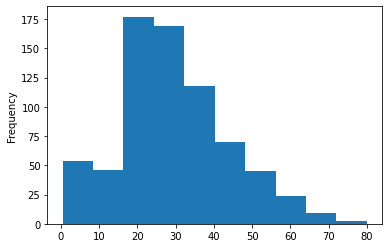

In [32]:
train['Age'].plot(kind='hist')
plt.show()

In [33]:
train['Age'] = train['Age'].fillna(round(train['Age'].mean(),0))
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
test['Age'].fillna(round(test['Age'].mean(),0), inplace = True)
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
train = train.drop('Cabin', axis = 1)
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [36]:
test = test.drop('Cabin', axis = 1)
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [37]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
train['Embarked'] = train['Embarked'].fillna('S')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [40]:
test['Fare'].value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

In [41]:
test.groupby(['Pclass']).mean()['Fare']

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [42]:
train.groupby(['Pclass']).mean()['Fare']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

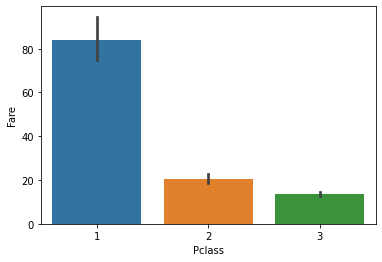

In [43]:
sns.barplot(x = 'Pclass', y = 'Fare', data=train)
plt.show()

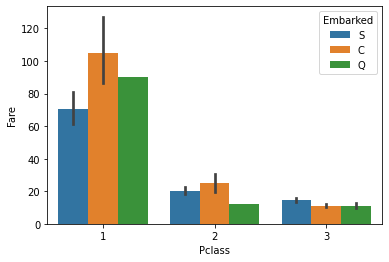

In [44]:
sns.barplot(x = 'Pclass', y = 'Fare', hue = 'Embarked', data=train)
plt.show()

In [45]:
test[test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [46]:
test.groupby(['Pclass', 'Embarked']).mean()['Fare']

Pclass  Embarked
1       C           110.073511
        Q            90.000000
        S            76.677504
2       C            20.120445
        Q            11.273950
        S            23.056090
3       C            10.658700
        Q             8.998985
        S            13.913030
Name: Fare, dtype: float64

In [47]:
test['Fare'] = test['Fare'].fillna(13.91)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


#### 범주형 자료

In [48]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [49]:
train['Survived'] = train['Survived'].astype('category')

In [50]:
train['Sex'] = train['Sex'].astype('category')
test['Sex'] = test['Sex'].astype('category')

In [51]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [52]:
train['Embarked'] = train['Embarked'].astype('category')
test['Embarked'] = test['Embarked'].astype('category')

In [53]:
train['Pclass'] = train['Pclass'].astype('category')
test['Pclass'] = test['Pclass'].astype('category')

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 52.8+ KB


In [55]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Embarked     418 non-null    category
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 24.6+ KB


In [56]:
# 범주형 자료 그래프
def showg(col) :
    sns.countplot(x=col, hue='Survived', data=train)
    plt.title(col)
    plt.show()

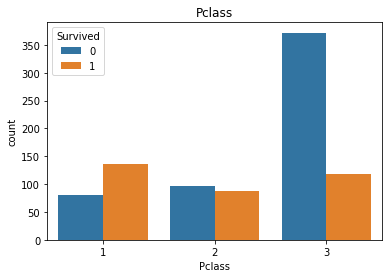

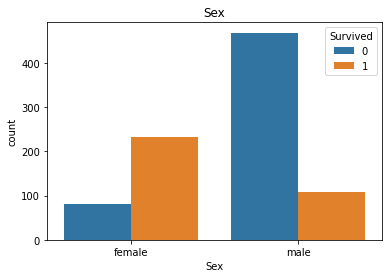

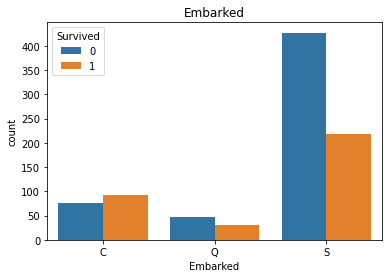

In [57]:
collt = ['Pclass', 'Sex', 'Embarked']

for col in collt :
    showg(col)

#### 수치형 자료

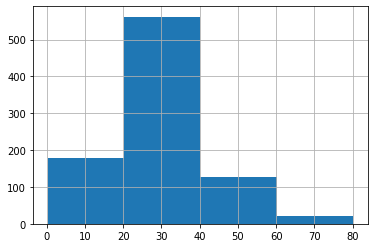

In [58]:
train['Age'].hist(bins=4)
plt.show()

In [59]:
# Age 범주형 자료로 변환
train['AgeGp'] = np.where(train['Age']<=20, 0, np.where(train['Age']<=40, 1, np.where(train['Age']<=60, 2, 3)))
train['AgeGp'].value_counts()

1    562
0    179
2    128
3     22
Name: AgeGp, dtype: int64

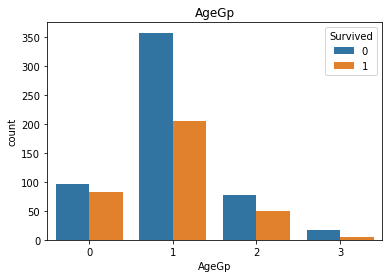

In [60]:
train['AgeGp'] = train['AgeGp'].astype('category')
showg('AgeGp')

In [61]:
test['AgeGp'] = np.where(test['Age']<=20, 0, np.where(test['Age']<=40, 1, np.where(test['Age']<=60, 2, 3)))
test['AgeGp'].value_counts()

1    272
0     69
2     66
3     11
Name: AgeGp, dtype: int64

In [62]:
test['AgeGp'] = test['AgeGp'].astype('category')

In [63]:
# SibSp 함께 탑승한 자녀, 배우자의 수
# Parch 함께 탑승한 부모님, 아이들의 수
# 혼자 탑승했는지 여부
train['pnum'] = train['SibSp'] + train['Parch']
train['pnum'] = np.where(train['pnum']>0, 0, 1)
train['pnum'].value_counts()

1    537
0    354
Name: pnum, dtype: int64

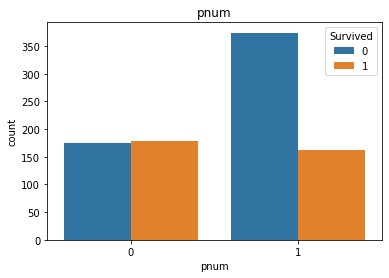

In [64]:
train['pnum'] = train['pnum'].astype('category')
showg('pnum')

In [65]:
test['pnum'] = test['SibSp'] + test['Parch']
test['pnum'] = np.where(test['pnum']>0, 0, 1)
test['pnum'] = test['pnum'].astype('category')

#### 범주형 자료 수치값으로 변환

In [66]:
train['Sex'].unique()

['male', 'female']
Categories (2, object): ['female', 'male']

In [67]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

In [68]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(train['Embarked'])
train['Embarked'] = encoder.transform(train['Embarked'])

In [70]:
train['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [72]:
train['Embarked'] = train['Embarked'].astype('category')

In [73]:
encoder.fit(test['Embarked'])
test['Embarked'] = encoder.transform(test['Embarked'])
test['Embarked'].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [74]:
test['Embarked'] = test['Embarked'].astype('category')

#### 학습데이터와 테스트데이터 정리

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
 11  AgeGp        891 non-null    category
 12  pnum         891 non-null    category
dtypes: category(6), float64(2), int64(3), object(2)
memory usage: 54.9+ KB


In [76]:
feature = train[['Pclass', 'Sex', 'AgeGp', 'Embarked', 'pnum']]
feature.head()

,Pclass,Sex,AgeGp,Embarked,pnum
0,3,0,1,2,0
1,1,1,1,0,0
2,3,1,1,2,1
3,1,1,1,2,0
4,3,0,1,2,1


In [77]:
target = train['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: category
Categories (2, int64): [0, 1]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(feature, target , random_state=7)

dt = DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

accuracy_score(y_test, pred)

0.7757847533632287

In [79]:
X_train, X_test, y_train, y_test = train_test_split(feature, target ,shuffle=True, stratify=target, random_state=7)

dt = DecisionTreeClassifier(random_state=156)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

accuracy_score(y_test, pred)

0.7982062780269058

In [80]:
feature_test = test[['Pclass', 'Sex', 'AgeGp', 'Embarked', 'pnum']]
feature_test.head()

,Pclass,Sex,AgeGp,Embarked,pnum
0,3,0,1,1,1
1,3,1,2,2,0
2,2,0,3,1,1
3,3,0,1,2,1
4,3,1,1,2,0


In [81]:
dtp = dt.predict(feature_test)
dtp

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [82]:
submission = pd.read_csv(r"C:\Users\82109\OneDrive\바탕 화면\gender_submission.csv")
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [83]:
submission['Survived'] = dtp
submission.head(7)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1


In [84]:
submission.to_csv(r"C:\Users\82109\OneDrive\바탕 화면\gender_submission.csv", index=False)